In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [12]:
PATH = os.getcwd();
PATH = PATH+"\\AV_Lord"

In [123]:
df_raw = pd.read_feather(f'{PATH}\combined.raw')

In [124]:
df_raw.shape

(1023217, 29)

In [125]:
df_raw.head(1)

,id,user_id,campaign_id,is_open,is_click,send_Year,send_Month,send_Week,send_Day,send_Dayofweek,...,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url,link_diff,img_per_sec,link_diff_%,img_per_section
0,42_14051,14051.0,42,0.0,0.0,2017.0,1.0,2.0,9.0,0.0,...,79,13,4,"September Newsletter\r\n \r\nDear AVians,\r\n ...",[September] Exciting days ahead with DataHack ...,http://r.newsletters.analyticsvidhya.com/7v3rd...,9,3.25,0.102273,3.25


In [126]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)

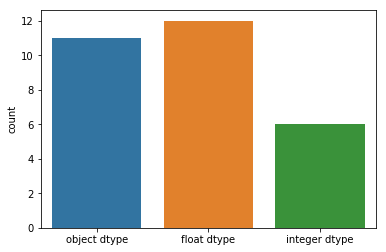

In [127]:
def disply_dtype_plot(df = None):
    if df is None:
        return
    l = []
    cols = df.columns
    for i in cols:
        if df[i].dtype == 'int64':
            l.append('integer dtype')
        elif df[i].dtype == 'object':
            l.append('object dtype')
        elif df[i].dtype == 'float64':
            l.append('float dtype')
        else:
            pass
    sns.countplot(l)
    del l
disply_dtype_plot(df_raw)

In [128]:
df_raw.head(0)

,id,user_id,campaign_id,is_open,is_click,send_Year,send_Month,send_Week,send_Day,send_Dayofweek,...,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url,link_diff,img_per_sec,link_diff_%,img_per_section


In [129]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023217 entries, 0 to 1023216
Data columns (total 29 columns):
id                       1023191 non-null object
user_id                  1023191 non-null float64
campaign_id              1023217 non-null int64
is_open                  1023191 non-null float64
is_click                 1023191 non-null float64
send_Year                1023191 non-null float64
send_Month               1023191 non-null float64
send_Week                1023191 non-null float64
send_Day                 1023191 non-null float64
send_Dayofweek           1023191 non-null float64
send_Dayofyear           1023191 non-null float64
send_Is_month_end        1023191 non-null object
send_Is_month_start      1023191 non-null object
send_Is_quarter_end      1023191 non-null object
send_Is_quarter_start    1023191 non-null object
send_Is_year_end         1023191 non-null object
send_Is_year_start       1023191 non-null object
communication_type       1023217 non-null obje

In [130]:
df_raw = df_raw * 1

In [131]:
train_cats(df_raw)

In [132]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/av_lord-raw')

In [133]:
df_raw = pd.read_feather('tmp/av_lord-raw')

In [134]:
df, y, nas, mapper = proc_df(df_raw, 'is_click', do_scale=True,max_n_cat=30)

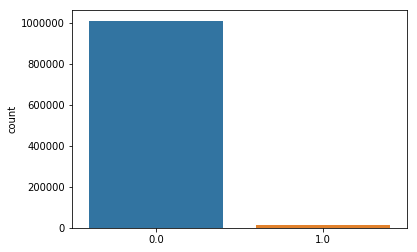

In [135]:
sns.countplot(y)

In [139]:
y[-26:] = 0

In [229]:
#df.drop('is_open', axis=1, inplace=True)
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

0.7547053047196518

In [141]:
def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [ ]:
m = RandomForestRegressor(n_jobs=-1)
%%time m.fit(X_train, y_train)
print_score(m)

In [173]:
display_all(test.isnull().sum().sort_index()/len(df_raw))

campaign_id    0.0
id             0.0
send_date      0.0
user_id        0.0
dtype: float64

In [178]:
display_all(df.columns)

Index(['id', 'user_id', 'campaign_id', 'send_Year', 'send_Month', 'send_Week',
       'send_Day', 'send_Dayofweek', 'send_Dayofyear', 'total_links',
       'no_of_internal_links', 'no_of_images', 'no_of_sections', 'email_body',
       'subject', 'email_url', 'link_diff', 'img_per_sec', 'link_diff_%',
       'img_per_section', 'user_id_na', 'is_open_na', 'send_Year_na',
       'send_Month_na', 'send_Week_na', 'send_Day_na', 'send_Dayofweek_na',
       'send_Dayofyear_na', 'send_Is_month_end_0.0', 'send_Is_month_end_nan',
       'send_Is_month_start_0.0', 'send_Is_month_start_nan',
       'send_Is_quarter_end_0.0', 'send_Is_quarter_end_nan',
       'send_Is_quarter_start_0.0', 'send_Is_quarter_start_nan',
       'send_Is_year_end_0.0', 'send_Is_year_end_nan',
       'send_Is_year_start_0.0', 'send_Is_year_start_nan',
       'communication_type_Conference', 'communication_type_Corporate',
       'communication_type_Hackathon', 'communication_type_Newsletter',
       'communication_type_Ot

## testset transforms

In [194]:
test = pd.read_csv(f'{PATH}\\test_BDIfz5B.csv')

In [195]:
test['y'] = y[:773858]

In [196]:
test.head(2)

,id,campaign_id,user_id,send_date,y
0,63_122715,63,122715,01-02-2018 22:35,0.0
1,56_76206,56,76206,02-01-2018 08:15,0.0


In [197]:
add_datepart(test,'send_date')

In [198]:
test.drop('send_Elapsed',axis=1,inplace=True)
test.head(2)

,id,campaign_id,user_id,y,send_Year,send_Month,send_Week,send_Day,send_Dayofweek,send_Dayofyear,send_Is_month_end,send_Is_month_start,send_Is_quarter_end,send_Is_quarter_start,send_Is_year_end,send_Is_year_start
0,63_122715,63,122715,0.0,2018,1,1,2,1,2,False,False,False,False,False,False
1,56_76206,56,76206,0.0,2018,2,5,1,3,32,False,True,False,False,False,False


In [199]:
np.unique(camp['campaign_id'])

array([29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80], dtype=int64)

In [200]:
test = test.merge(camp,on='campaign_id');

,id,campaign_id,user_id,y,send_Year,send_Month,send_Week,send_Day,send_Dayofweek,send_Dayofyear,send_Is_month_end,send_Is_month_start,send_Is_quarter_end,send_Is_quarter_start,send_Is_year_end,send_Is_year_start,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url
0,63_122715,63,122715,0.0,2018,1,1,2,1,2,False,False,False,False,False,False,Newsletter,68,64,15,5,\r\nFebruary 2018 Newsletter\r\n \r\nDear AVia...,"AVbytes, Ultimate 2018 learning path and aweso...",http://r.newsletters.analyticsvidhya.com/7whsu...
1,63_124394,63,124394,0.0,2018,1,1,2,1,2,False,False,False,False,False,False,Newsletter,68,64,15,5,\r\nFebruary 2018 Newsletter\r\n \r\nDear AVia...,"AVbytes, Ultimate 2018 learning path and aweso...",http://r.newsletters.analyticsvidhya.com/7whsu...
2,63_95168,63,95168,0.0,2018,1,1,2,1,2,False,False,False,False,False,False,Newsletter,68,64,15,5,\r\nFebruary 2018 Newsletter\r\n \r\nDear AVia...,"AVbytes, Ultimate 2018 learning path and aweso...",http://r.newsletters.analyticsvidhya.com/7whsu...
3,63_31556,63,31556,0.0,2018,1,1,2,1,2,False,False,False,False,False,False,Newsletter,68,64,15,5,\r\nFebruary 2018 Newsletter\r\n \r\nDear AVia...,"AVbytes, Ultimate 2018 learning path and aweso...",http://r.newsletters.analyticsvidhya.com/7whsu...
4,63_138377,63,138377,0.0,2018,1,1,2,1,2,False,False,False,False,False,False,Newsletter,68,64,15,5,\r\nFebruary 2018 Newsletter\r\n \r\nDear AVia...,"AVbytes, Ultimate 2018 learning path and aweso...",http://r.newsletters.analyticsvidhya.com/7whsu...
5,63_88136,63,88136,0.0,2018,1,1,2,1,2,False,False,False,False,False,False,Newsletter,68,64,15,5,\r\nFebruary 2018 Newsletter\r\n \r\nDear AVia...,"AVbytes, Ultimate 2018 learning path and aweso...",http://r.newsletters.analyticsvidhya.com/7whsu...
6,63_18079,63,18079,0.0,2018,1,1,2,1,2,False,False,False,False,False,False,Newsletter,68,64,15,5,\r\nFebruary 2018 Newsletter\r\n \r\nDear AVia...,"AVbytes, Ultimate 2018 learning path and aweso...",http://r.newsletters.analyticsvidhya.com/7whsu...
7,63_84118,63,84118,0.0,2018,1,1,2,1,2,False,False,False,False,False,False,Newsletter,68,64,15,5,\r\nFebruary 2018 Newsletter\r\n \r\nDear AVia...,"AVbytes, Ultimate 2018 learning path and aweso...",http://r.newsletters.analyticsvidhya.com/7whsu...
8,63_45321,63,45321,0.0,2018,1,1,2,1,2,False,False,False,False,False,False,Newsletter,68,64,15,5,\r\nFebruary 2018 Newsletter\r\n \r\nDear AVia...,"AVbytes, Ultimate 2018 learning path and aweso...",http://r.newsletters.analyticsvidhya.com/7whsu...
9,63_7092,63,7092,0.0,2018,1,1,2,1,2,False,False,False,False,False,False,Newsletter,68,64,15,5,\r\nFebruary 2018 Newsletter\r\n \r\nDear AVia...,"AVbytes, Ultimate 2018 learning path and aweso...",http://r.newsletters.analyticsvidhya.com/7whsu...


In [202]:
test['link_diff'] = test['total_links'] - test['no_of_internal_links']
test['av_links'] = (test['no_of_internal_links']/ test['total_links']) * 100
test['img_per_section'] = test['no_of_images']/ test['no_of_sections']

test['link_diff_%'] = (test['total_links'] - test['no_of_internal_links'])/test['total_links'] * 100
test.head(1)

,id,campaign_id,user_id,y,send_Year,send_Month,send_Week,send_Day,send_Dayofweek,send_Dayofyear,...,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url,link_diff,av_links,img_per_section,link_diff_%
0,63_122715,63,122715,0.0,2018,1,1,2,1,2,...,64,15,5,\r\nFebruary 2018 Newsletter\r\n \r\nDear AVia...,"AVbytes, Ultimate 2018 learning path and aweso...",http://r.newsletters.analyticsvidhya.com/7whsu...,4,94.117647,3.0,5.882353


In [205]:
test.to_feather('tmp/av_lord_test')

In [208]:
train_cats(test)

In [212]:
nas

{'is_open': 0.0,
 'send_Day': 10.0,
 'send_Dayofweek': 3.0,
 'send_Dayofyear': 67.0,
 'send_Month': 3.0,
 'send_Week': 10.0,
 'send_Year': 2017.0,
 'user_id': 120476.0}

In [214]:
test.columns

Index(['id', 'campaign_id', 'user_id', 'y', 'send_Year', 'send_Month',
       'send_Week', 'send_Day', 'send_Dayofweek', 'send_Dayofyear',
       'send_Is_month_end', 'send_Is_month_start', 'send_Is_quarter_end',
       'send_Is_quarter_start', 'send_Is_year_end', 'send_Is_year_start',
       'communication_type', 'total_links', 'no_of_internal_links',
       'no_of_images', 'no_of_sections', 'email_body', 'subject', 'email_url',
       'link_diff', 'av_links', 'img_per_section', 'link_diff_%'],
      dtype='object')

In [215]:
mapper

DataFrameMapper(default=False, df_out=False,
        features=[(['user_id'], StandardScaler(copy=True, with_mean=True, with_std=True)), (['campaign_id'], StandardScaler(copy=True, with_mean=True, with_std=True)), (['is_open'], StandardScaler(copy=True, with_mean=True, with_std=True)), (['send_Year'], StandardScaler(copy=True, with_mean=True, with_std=... with_std=True)), (['send_Dayofyear_na'], StandardScaler(copy=True, with_mean=True, with_std=True))],
        input_df=False, sparse=False)

In [217]:
test.columns

Index(['id', 'campaign_id', 'user_id', 'y', 'send_Year', 'send_Month',
       'send_Week', 'send_Day', 'send_Dayofweek', 'send_Dayofyear',
       'send_Is_month_end', 'send_Is_month_start', 'send_Is_quarter_end',
       'send_Is_quarter_start', 'send_Is_year_end', 'send_Is_year_start',
       'communication_type', 'total_links', 'no_of_internal_links',
       'no_of_images', 'no_of_sections', 'email_body', 'subject', 'email_url',
       'link_diff', 'av_links', 'img_per_section', 'link_diff_%'],
      dtype='object')

In [218]:
test, _, _ = proc_df(test,max_n_cat=30,mapper=mapper,na_dict=nas)

In [219]:
test.columns

Index(['id', 'campaign_id', 'user_id', 'y', 'send_Year', 'send_Month',
       'send_Week', 'send_Day', 'send_Dayofweek', 'send_Dayofyear',
       ...
       'email_url_http://r.newsletters.analyticsvidhya.com/7wra6vb5p4c.html?t=1520942329',
       'email_url_http://r.newsletters.analyticsvidhya.com/7wrjo7b5p4c.html?t=1520942329',
       'email_url_http://r.newsletters.analyticsvidhya.com/7ww0uvb5p4c.html?t=1520940826',
       'email_url_http://r.newsletters.analyticsvidhya.com/7wx2s7b5p4c.html?t=1520940826',
       'email_url_http://r.newsletters.analyticsvidhya.com/7wxlqvb5p4c.html?t=1520940826',
       'email_url_http://r.newsletters.analyticsvidhya.com/7wxv87b5p4c.html?t=1520940826',
       'email_url_http://r.newsletters.analyticsvidhya.com/7wz6mvb5p4c.html?t=1520940826',
       'email_url_http://r.newsletters.analyticsvidhya.com/7wzpljb5p4c.html?t=1520935115',
       'email_url_http://r.newsletters.analyticsvidhya.com/7x08k7b5p4c.html?t=1520935115',
       'email_url_nan'],
      

In [224]:
df.drop(list(set(df.columns) - set(test.columns)), axis=1,inplace=True)

In [228]:
len(test.columns)

29

In [227]:
len(df.columns)

29

2.000000     211722
7.000000     139380
3.000000     132195
13.000000     85433
2.500000      82163
16.000000     81358
3.250000      81253
4.000000      76361
1.000000      50942
2.833333      39710
3.166667      39498
5.000000       3198
3.750000          2
3.500000          1
9.000000          1
Name: img_per_sec, dtype: int64


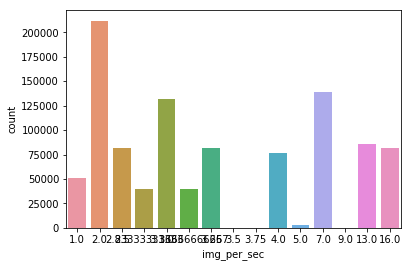

In [51]:
print(df['img_per_sec'].value_counts())
sns.countplot(df['img_per_sec'],orient='h');

0.0    920401
1.0    102790
Name: is_open, dtype: int64


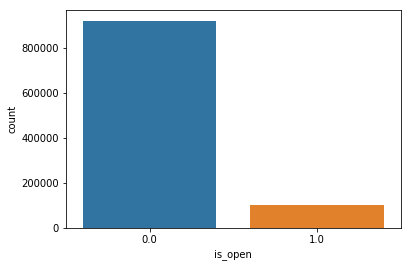

In [43]:
print(df['is_open'].value_counts())
sns.countplot(df['is_open']);

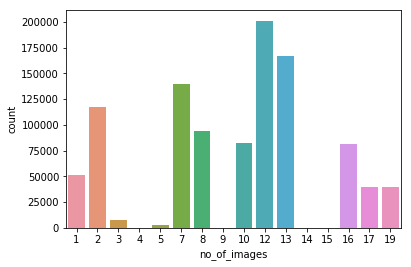

In [38]:
sns.countplot(df['no_of_images']);

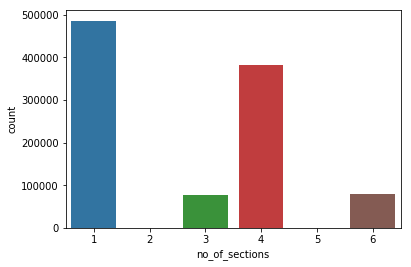

In [39]:
sns.countplot(df['no_of_sections']);

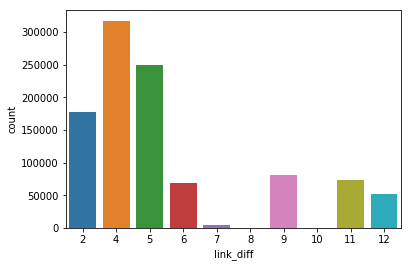

In [37]:
sns.countplot(df['link_diff']);

In [81]:
train_cats(df)

In [82]:
apply_cats(test, df)

In [87]:
df.drop(['id', 'user_id'], axis=1, inplace=True);
test.drop(['id', 'user_id'], axis=1, inplace=True);

In [88]:
df.head(1)

,campaign_id,send_Year,send_Month,send_Week,send_Day,send_Dayofweek,send_Dayofyear,send_Is_month_end,send_Is_month_start,send_Is_quarter_end,...,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url,link_diff,link_diff_%,img_per_section,av_links
0,42,2017.0,1.0,2.0,9.0,0.0,9.0,False,False,False,...,79,13,4,"September Newsletter\r\n \r\nDear AVians,\r\n ...",[September] Exciting days ahead with DataHack ...,http://r.newsletters.analyticsvidhya.com/7v3rd...,9,10.227273,3.25,89.772727


In [89]:
test.head(1)

,campaign_id,send_Year,send_Month,send_Week,send_Day,send_Dayofweek,send_Dayofyear,send_Is_month_end,send_Is_month_start,send_Is_quarter_end,...,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url,link_diff,av_links,img_per_section,link_diff_%
0,63,2018,1,1,2,1,2,False,False,False,...,64,15,5,\r\nFebruary 2018 Newsletter\r\n \r\nDear AVia...,"AVbytes, Ultimate 2018 learning path and aweso...",http://r.newsletters.analyticsvidhya.com/7whsu...,4,94.117647,3.0,5.882353


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023217 entries, 0 to 1023216
Data columns (total 25 columns):
campaign_id              1023217 non-null int64
send_Year                1023191 non-null float64
send_Month               1023191 non-null float64
send_Week                1023191 non-null float64
send_Day                 1023191 non-null float64
send_Dayofweek           1023191 non-null float64
send_Dayofyear           1023191 non-null float64
send_Is_month_end        1023191 non-null category
send_Is_month_start      1023191 non-null category
send_Is_quarter_end      1023191 non-null category
send_Is_quarter_start    1023191 non-null category
send_Is_year_end         1023191 non-null category
send_Is_year_start       1023191 non-null category
communication_type       1023217 non-null category
total_links              1023217 non-null int64
no_of_internal_links     1023217 non-null int64
no_of_images             1023217 non-null int64
no_of_sections           1023217 non-n

In [99]:
categorical_features_indices = np.where(df.dtypes == 'category')[0]

In [100]:
categorical_features_indices

array([ 7,  8,  9, 10, 11, 12, 13, 18, 19, 20], dtype=int64)

In [103]:
df[:].fillna(method='ffill', inplace=True)

In [106]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [109]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1, random_state=17, solver='lbfgs',class_weight='balanced',n_jobs=-1,max_iter=1000)

In [112]:
df.drop(['email_body','subject','email_url'], axis =1, inplace=True)
test.drop(['email_body','subject','email_url'], axis =1, inplace=True)

In [116]:
train_cats(df)

In [117]:
apply_cats(test,df)

In [121]:
categorical_features_indices = np.where(df.dtypes == 'category')[0]

In [122]:
categorical_features_indices

array([ 7,  8,  9, 10, 11, 12, 13], dtype=int64)

In [133]:
#importing library and building model
from catboost import CatBoostRegressor
#model=CatBoostClassifier(iterations=1000, depth=10,learning_rate=0.01, loss_function='CrossEntropy',\
                         #)
#model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation))

In [128]:
df, _, nan, mapper = proc_df(df,do_scale=True,max_n_cat=30)

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(df, y_target, train_size=0.8, random_state=1234)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [136]:
lr.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [139]:
df.isnull().head()

,campaign_id,send_Year,send_Month,send_Week,send_Day,send_Dayofweek,send_Dayofyear,total_links,no_of_internal_links,no_of_images,...,send_Is_year_start_False,send_Is_year_start_nan,communication_type_Conference,communication_type_Corporate,communication_type_Hackathon,communication_type_Newsletter,communication_type_Others,communication_type_Upcoming Events,communication_type_Webinar,communication_type_nan
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [230]:
m

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [232]:
preds = m.predict(test)

In [239]:
preds

array([ 0.5,  0.5,  0.6, ...,  0.6,  0.6,  0.6])

In [233]:
sample_sub['is_click'] = preds

In [234]:
sample_sub

,id,is_click
0,63_122715,0.5
1,56_76206,0.5
2,57_96189,0.6
3,56_166917,0.5
4,56_172838,0.5
5,71_50253,0.6
6,76_128244,0.5
7,74_195513,0.5
8,67_74617,0.5
9,75_140599,0.5


In [241]:
def make_submission(probs):
    sample = pd.read_csv(f'{PATH}//sample_submission.csv')
    submit = sample.copy()
    submit['is_click'] = probs
    return submit

In [242]:
submit = make_submission(preds)

In [243]:
submit.head(2)

,id,is_click
0,63_122715,0.5
1,56_76206,0.5


In [244]:
submit.to_csv(PATH + '//av_cat_2.csv', index=False)